In [ ]:
from google.colab import drive
import os

drive.mount("/content/drive")
%cd "drive/MyDrive/Colab Notebooks/TinyML"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/TinyML


In [1]:
import torch
from torch.nn.functional import interpolate
import numpy as np
import matplotlib.pyplot as plt

In [16]:
n = 500
dt = 5.0 / 500

data = []

with open('./data/tinyml_contest_data_training/S02-SR-20.txt') as file:
    for line in file:
        data.append(float(line.strip()))

data = torch.tensor(data)
data = data[None, None, :]
data.shape

torch.Size([1, 1, 1250])

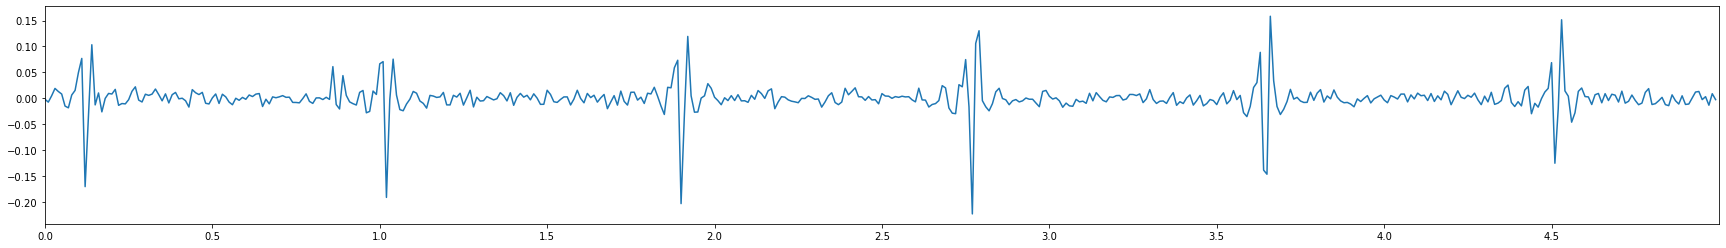

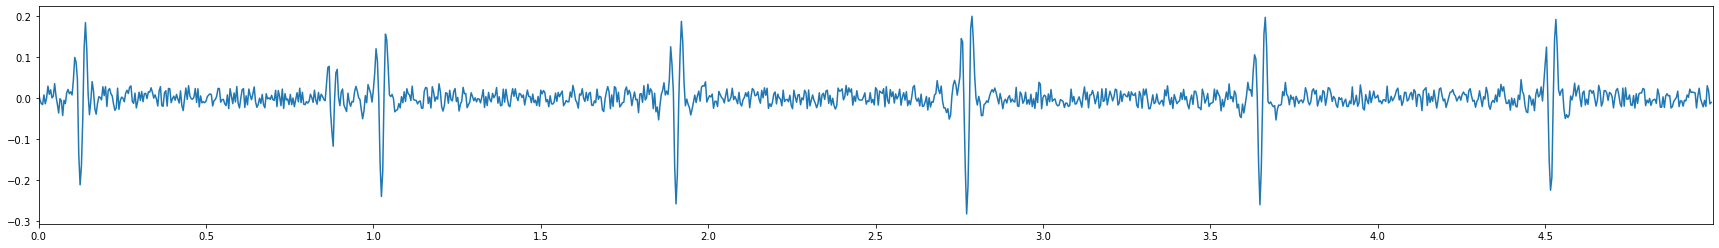

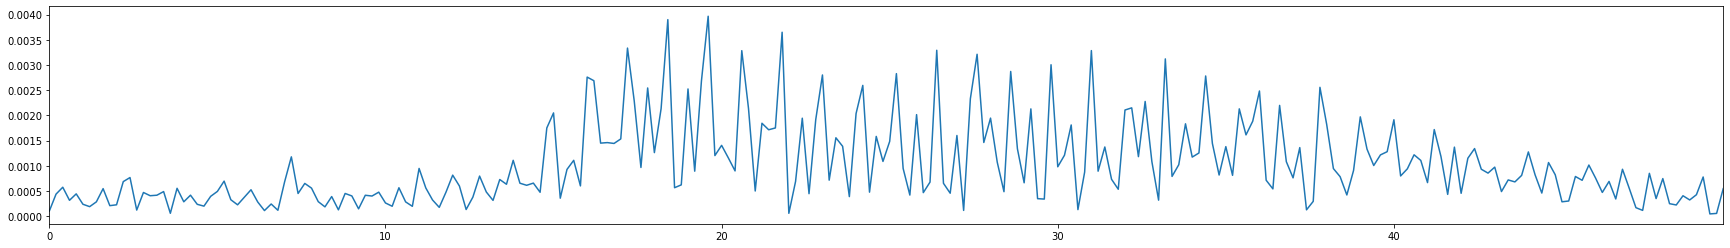

In [17]:
time = [5*(x/1250) for x in range(1250)]
time_int = [5*(x/500) for x in range(500)]
interp = interpolate(data, scale_factor=0.4, mode="area")
interp = interp[0, 0, :].tolist()

plt.rcParams["figure.figsize"] = (30,4)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
plt.xlim(0, 5)
plt.plot(time_int, interp)
plt.show()

plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
plt.xlim(0, 5)
plt.plot(time, data[0, 0, :])
plt.show()

freq = (1/(dt*n)) * np.arange(n)
fhat = torch.fft.fft(torch.tensor(interp))
psd = abs(fhat) / n
L = np.arange(0, np.floor(n/2), dtype='int')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.plot(freq, psd)
plt.show()